[View in Colaboratory](https://colab.research.google.com/github/billmlion/keras_ws/blob/master/8_keras_cnn_mnist.ipynb)

>[1.数据预处理](#scrollTo=4NNSQe_Iz2qB)

>[2.建立模型](#scrollTo=nr8g_l495qMF)

>[3.训练模型](#scrollTo=wjP45fK_HcgE)

>[4.评估模型准确率](#scrollTo=hQB4eB0nUXYK)

>[5.进行预测](#scrollTo=nhW24HexUrBk)

>[6.查看预测结果](#scrollTo=SAUKuayGU9Ng)

>>[混淆矩阵](#scrollTo=v1ktZ9lgVKUa)



# 1.数据预处理

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [3]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [0]:
#@title 卷积神经网络因为需要卷积与池化运算，所以需要保持图像的维数，所以reshape转化为6000项，每一项为28x28x1的图像（高x宽x单色）；
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [0]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [0]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)



**1.   卷积神经网络因为需要卷积与池化运算，所以需要保持图像的维数，所以reshape转化为6000项，每一项为28x28x1的图像（高x宽x单色）**

**2.   多层感知器直接送进神经元处理，所以reshape转化为6000项，每项为784个（28x28）数字作为神经元输入；**



# 2.建立模型

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [0]:
model = Sequential()

In [0]:
#@title 建立卷积层1，输入图像大小为28x28，建立16个图像滤镜，每个滤镜大小5x5
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1), 
                 activation='relu'))

In [0]:
#@title 建立池化层1，16个28x28图像缩小为16个14x14图像
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
#@title 建立卷积层2，图像大小仍为14x14，由原来16个滤镜建立36个图像滤镜，每个滤镜大小5x5
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))

In [0]:
#@title 建立池化层1，36个14x14图像缩小为36个7x7图像
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Dropout(0.25))

In [0]:
#@title 建立平坦层，36个7x7的图像转化为一维向量，长度是36x7x7=1764 个Float数，正好对应1764个神经元。
model.add(Flatten())

In [0]:
#@title 建立隐藏层，128个神经元
model.add(Dense(128, activation='relu'))

In [0]:
model.add(Dropout(0.5))

In [0]:
#@title 建立输出层，共10个神经元，对应0-9共10个数字，使用softmax激活函数进行转化，softmax可以将神经元的输出转换为预测每个数字的概率
model.add(Dense(10,activation='softmax'))

In [20]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

# 3.训练模型

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [25]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=20, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 66s - loss: 0.1421 - acc: 0.9586 - val_loss: 0.0694 - val_acc: 0.9794
Epoch 2/20
 - 67s - loss: 0.1057 - acc: 0.9683 - val_loss: 0.0528 - val_acc: 0.9843
Epoch 3/20
 - 67s - loss: 0.0845 - acc: 0.9749 - val_loss: 0.0488 - val_acc: 0.9855
Epoch 4/20
 - 67s - loss: 0.0733 - acc: 0.9778 - val_loss: 0.0408 - val_acc: 0.9880
Epoch 5/20
 - 67s - loss: 0.0653 - acc: 0.9807 - val_loss: 0.0382 - val_acc: 0.9888
Epoch 6/20
 - 67s - loss: 0.0562 - acc: 0.9826 - val_loss: 0.0379 - val_acc: 0.9890
Epoch 7/20
 - 67s - loss: 0.0536 - acc: 0.9836 - val_loss: 0.0355 - val_acc: 0.9896
Epoch 8/20
 - 67s - loss: 0.0462 - acc: 0.9864 - val_loss: 0.0361 - val_acc: 0.9893
Epoch 9/20
 - 67s - loss: 0.0424 - acc: 0.9870 - val_loss: 0.0356 - val_acc: 0.9901
Epoch 10/20
 - 67s - loss: 0.0410 - acc: 0.9878 - val_loss: 0.0316 - val_acc: 0.9910
Epoch 11/20
 - 67s - loss: 0.0370 - acc: 0.9884 - val_loss: 0.0317 - val_acc: 0.9913
Epoch 12/20
 - 67s - los

In [0]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

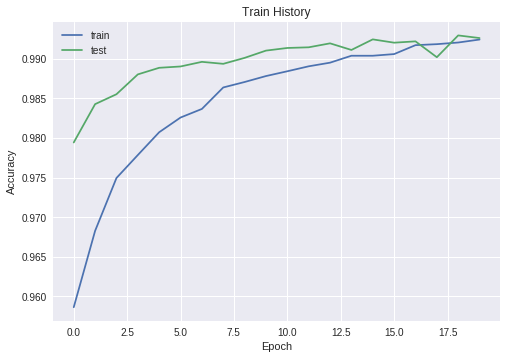

In [27]:
show_train_history('acc','val_acc')

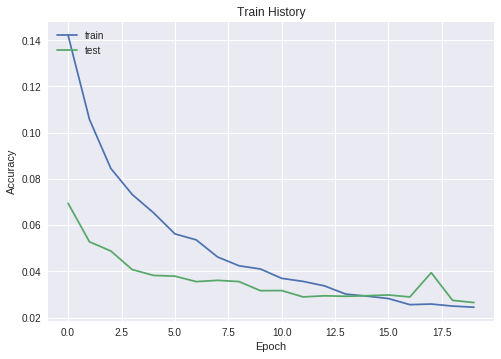

In [28]:
show_train_history('loss','val_loss')

# 4.评估模型准确率

In [30]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 5s 516us/step


0.9925

# 5.进行预测

In [0]:
prediction=model.predict_classes(x_Test4D_normalize)

In [33]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

# 6.查看预测结果

In [0]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

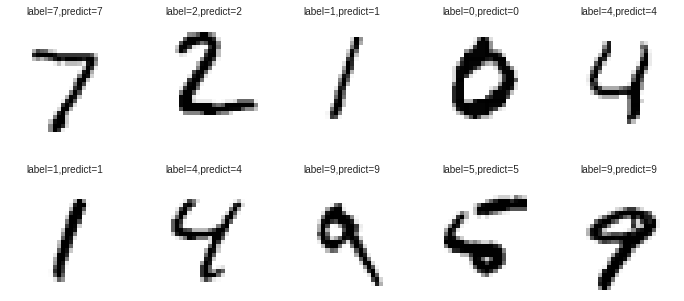

In [36]:
plot_images_labels_prediction(x_Test,y_Test,prediction,idx=0)

## 混淆矩阵

In [37]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,975,1,0,0,0,0,1,0,2,1
1,0,1129,1,1,0,1,0,1,2,0
2,1,0,1028,0,0,0,0,2,1,0
3,0,0,0,1005,0,4,0,0,1,0
4,0,0,0,0,970,0,1,1,1,9
5,0,0,0,3,0,886,1,0,1,1
6,4,2,0,1,2,3,944,0,2,0
7,0,1,4,2,0,0,0,1016,1,4
8,1,0,2,0,0,1,0,0,967,3


In [0]:
df = pd.DataFrame({'label':y_Test, 'predict':prediction})

In [39]:
df[(df.label==5)&(df.predict==3)]

,label,predict
1393,5,3
2035,5,3
2597,5,3
